# Continuous Control


## 1 Import the environment

We are building the model here based on single agent and so we are building the unity environement below

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

This step here enables to view the agents size and the state sizes that are required here

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

When finished, you can close the environment.

In [6]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg import Agent

### 3. Building our agent

Below we are importing our agents that we have built using the **model.py** and **ddpn.py** which defines our Actor Critic Architecture. 

**Actor_Network** - The actor network architecture consistes of 2 hidden layers and consists of 3 fully connected layers with 128,128 and 64 units respectively

**Critic Network** - The critic architecture consists of 2 hidden layers with 128 units each

Additional Parameters such as
Replay Buffer - 1e05
Actor_LR == Critic_LR = 1.5e-04
Weight decay 1e-06
Discount Factor(gamma) - 0.93




In [7]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=3)

## 4. Training our agent

We initialize 1000 episodes with a horizon of 1000 steps too. The goal is to attain a reward of 30 avergaing atleast 100 episodes

In [10]:
def ddpg(n_episodes=1000, max_t=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    for i_episode in range(1, n_episodes+1):
        #scores = np.zeros(num_agents)
        env_info = env.reset(train_mode=True)[brain_name] 
        state = env_info.vector_observations[0]
        agent.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name] 
            next_state = env_info.vector_observations[0]
            reward = reward = env_info.rewards[0]
            done = env_info.local_done[0]
            #next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward 
            if done:
                break 
        scores_deque.append(score)
        scores.append(score)
        #avg_perstep.append(s)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        if np.mean(scores_deque) >= 30:
            print(f"Reward of 30 achieved in {i_episode}")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg()

Episode 100	Average Score: 3.95
Episode 200	Average Score: 25.89
Episode 220	Average Score: 30.00Reward of 30 achieved in 220


## 5. Plotting our reward

We were successfully able to achieve the desired reward in **220-100** episodes. A plot below depicts how the model
learned

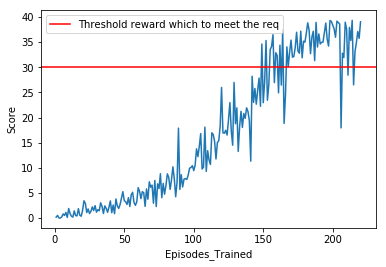

In [20]:

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episodes_Trained')
plt.axhline(y=30,color = 'red',label = 'Threshold reward which to meet the req')
plt.legend()
plt.show()
plt.savefig('final_threshold.png');

In [ ]:
env.close()

### 6. Future Work

Hyperparamter tuning plays a pivotal role in shaping how our model is learning. Finetuning them would certainly improve the reward in lower episodes. Additionally this exercise utilizes Deep Deterministic policy gradient approach. **D4PG** is another algorithm that can be implemented to further the accuracy.